# ResNeXt & DenseNet : Pretrained vs Fine_tuning 

## config

In [1]:
import torch 
import os

# 设置自定义下载路径
os.environ['TORCH_HOME'] = './models'

# 配置
config = {
    "data_dir" : './data',
    "device" : torch.device('cuda' if torch.cuda.is_available() else 'mps'
                if torch.backends.mps.is_available() else 'cpu'),
    "train_limit" : 300,
    "test_limit" : 30,
    "batch_size" : 128,
"save_dir" : "./save",
}

data_dir = config['data_dir']
device = config['device']
train_limit = config['train_limit']
test_limit = config['test_limit']
batch_size = config['batch_size']
save_dir = config['save_dir']

# 创建保存目录
os.makedirs(save_dir, exist_ok=True)
os.makedirs(os.path.join(save_dir, "history"), exist_ok=True)
os.makedirs(os.path.join(save_dir, "models"), exist_ok=True)
os.makedirs(os.path.join(save_dir, "figures"), exist_ok=True)

## data_loader

In [2]:
from utils.data_loader import load_cifar10

In [3]:
# 导入DataSet、DataLoader
train_dataset, test_dataset, train_loader, test_loader = load_cifar10(data_dir=data_dir,
                                                                      batch_size=batch_size,
                                                                      train_limit=train_limit,
                                                                      test_limit=test_limit,
                                                                      random_seed=42)
print(f"训练集长度 : {len(train_dataset)}\n"
      f"测试集长度 : {len(test_dataset)}")

训练集长度 : 300
测试集长度 : 30


### show example

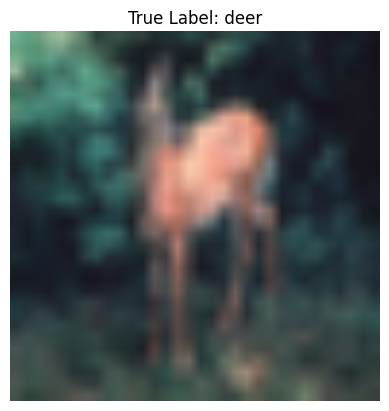

tensor([[[-0.1897, -0.1897, -0.1897,  ..., -1.9544, -1.9544, -1.9544],
         [-0.1897, -0.1897, -0.1897,  ..., -1.9544, -1.9544, -1.9544],
         [-0.1897, -0.1897, -0.1897,  ..., -1.9544, -1.9544, -1.9544],
         ...,
         [-1.0917, -1.0917, -1.0917,  ..., -1.3074, -1.3074, -1.3074],
         [-1.0917, -1.0917, -1.0917,  ..., -1.3074, -1.3074, -1.3074],
         [-1.0917, -1.0917, -1.0917,  ..., -1.3074, -1.3074, -1.3074]],

        [[ 1.0064,  1.0064,  1.0064,  ..., -1.9936, -1.9936, -1.9936],
         [ 1.0064,  1.0064,  1.0064,  ..., -1.9936, -1.9936, -1.9936],
         [ 1.0064,  1.0064,  1.0064,  ..., -1.9936, -1.9936, -1.9936],
         ...,
         [-0.8172, -0.8172, -0.8172,  ..., -1.1897, -1.1897, -1.1897],
         [-0.8172, -0.8172, -0.8172,  ..., -1.1897, -1.1897, -1.1897],
         [-0.8172, -0.8172, -0.8172,  ..., -1.1897, -1.1897, -1.1897]],

        [[ 0.4181,  0.4181,  0.4181,  ..., -1.8172, -1.8172, -1.8172],
         [ 0.4181,  0.4181,  0.4181,  ..., -1

In [4]:
import random
import matplotlib.pyplot as plt
from utils.predict import *
show_image(test_dataset)

## load model

In [ ]:
import torchvision.models as models
model_d = models.densenet121(pretrained=True).to(device)

/Users/xueyicheng/miniconda3/envs/ch2/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/xueyicheng/miniconda3/envs/ch2/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
from torch import nn, optim
# 训练超参数设置
learning_rate = 1e-4
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.AdamW(model_d.parameters(), lr=learning_rate, weight_decay=1e-5)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

## train

In [7]:
from utils.train import train_model

In [14]:
model_dd, history = train_model(
    model=model_d,
    train_loader=train_loader,
    test_loader=test_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=1,
    use_amp=True,
    scheduler=scheduler,
    early_stop_patience=8,
    save_interval=4,
    print_freq=1,
    load_best_model=False,
    load_last_model=False,
)


/Users/xueyicheng/Documents/人工神经网络模型与算法/Chapter2/utils/train.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler(enabled=use_amp)
/Users/xueyicheng/miniconda3/envs/ch2/lib/python3.12/site-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


save/DenseNet
Start training!
Device: mps, Model: DenseNet

 Epoch 1/1
------------------------------


Training:   0%|          | 0/3 [00:00<?, ?it/s]/Users/xueyicheng/Documents/人工神经网络模型与算法/Chapter2/utils/train.py:124: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=use_amp):
/Users/xueyicheng/miniconda3/envs/ch2/lib/python3.12/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
Exception ignored in sys.unraisablehook
KeyboardInterrupt



In [9]:
predict(model_dd, test_dataset)

NameError: name 'model_dd' is not defined

In [8]:
import os
import json
# 创建保存目录
save_dir = "./save/history"
os.makedirs(save_dir, exist_ok=True)

# 保存 history 到 JSON 文件
history_path = os.path.join(save_dir, "training_history.json")
with open(history_path, 'w') as f:
    json.dump(history, f)

print(f"History saved to {history_path}")

NameError: name 'history' is not defined

## 轻量级本地测试

In [9]:
# 设置用于本地快速测试的配置
import torchvision.models as models
from torch import nn, optim

# 使用轻量级模型(ResNet18)进行快速测试
light_model = models.resnet18(pretrained=True)
light_model.fc = nn.Linear(512, 10)  # 修改最后一层适应CIFAR10
light_model = light_model.to(device)

# 使用少量样本进行训练
light_train_limit = 200  # 仅使用200张训练图像
light_test_limit = 50    # 仅使用50张测试图像
light_batch_size = 16    # 小批量

# 加载缩小的数据集
light_train_dataset, light_test_dataset, light_train_loader, light_test_loader = load_cifar10(
    data_dir=data_dir,
    batch_size=light_batch_size,
    train_limit=light_train_limit,
    test_limit=light_test_limit,
    random_seed=42
)

print(f"轻量训练集长度 : {len(light_train_dataset)}\n"
      f"轻量测试集长度 : {len(light_test_dataset)}")

/Users/xueyicheng/miniconda3/envs/ch2/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


轻量训练集长度 : 200
轻量测试集长度 : 50


In [10]:
# 设置训练超参数
light_optimizer = optim.AdamW(light_model.parameters(), lr=1e-3, weight_decay=1e-4)
light_scheduler = optim.lr_scheduler.CosineAnnealingLR(light_optimizer, T_max=5)

# 训练轻量模型(仅训练2轮)
light_model, light_history = train_model(
    model=light_model,
    train_loader=light_train_loader,
    test_loader=light_test_loader,
    criterion=criterion,
    optimizer=light_optimizer,
    device=device,
    num_epochs=2,  # 仅训练2轮
    use_amp=False, # 本地测试不使用混合精度
    scheduler=light_scheduler,
    early_stop_patience=3,
    save_interval=1,
    print_freq=1,
    load_best_model=False,
    load_last_model=False,
    finetune=True  # 使用微调模式
)

/Users/xueyicheng/Documents/人工神经网络模型与算法/Chapter2/utils/train.py:54: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler(enabled=use_amp)


模型将保存到: save/ResNet_finetune
开始训练！
Device: mps, Model: ResNet_finetune, Mode: finetune

 Epoch 1/2
------------------------------


Training:   0%|          | 0/13 [00:00<?, ?it/s]/Users/xueyicheng/Documents/人工神经网络模型与算法/Chapter2/utils/train.py:149: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=use_amp):
evaluate: 100%|██████████| 4/4 [00:00<00:00,  8.94it/s]


test Loss: 2.3805 Acc: 0.1800
Epoch 1 : train_loss: 2.3391, train_acc: 0.2900, test_loss: 2.3805, test_acc: 0.1800, lr: 0.001000, time: 6.19s
模型断点已保存至 save/ResNet_finetune/ResNet_finetune_1.pth
新最佳模型，准确率 0.1800

 Epoch 2/2
------------------------------


evaluate: 100%|██████████| 4/4 [00:00<00:00, 29.87it/s]


test Loss: 4.2228 Acc: 0.2400
Epoch 2 : train_loss: 1.9062, train_acc: 0.3600, test_loss: 4.2228, test_acc: 0.2400, lr: 0.000905, time: 2.13s
模型断点已保存至 save/ResNet_finetune/ResNet_finetune_2.pth
新最佳模型，准确率 0.2400
总训练时间: 0:00:09.249153
训练历史已保存至 save/history/ResNet_finetune_20250407_213826.json


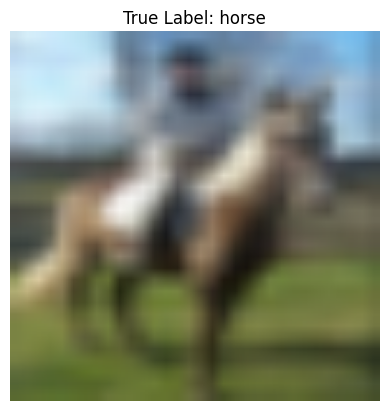

模型预测标签: horse


In [11]:
# 验证轻量模型性能
predict(light_model, light_test_dataset)

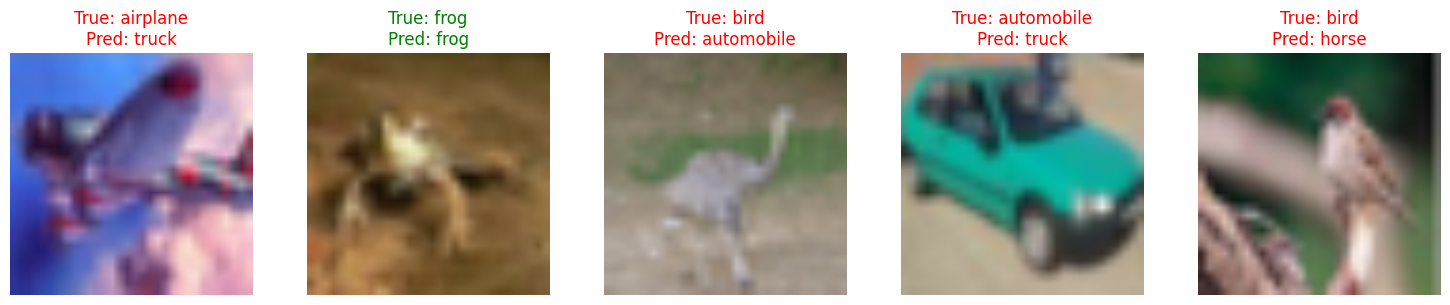

In [12]:
# 可视化预测结果
labels, predictions = predict_and_visualize(light_model, light_test_dataset, num_samples=5)